<h1><center><font size=8>AIML - Project 1</center></font></h1>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/En_Tr%C3%A6demoelle.gif" width="500" height="400"></center>
<h1><center>Cardio Good Fitness</center></h1>


### **Objective:**
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business.

You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the 2. different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.


### **Data Description:**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. 

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Loading the dataset**

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Read data from CSV file.
data = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project1/CardioGoodFitness.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### **Understanding the structure of the data**
- Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [5]:
# Checking first few rows to make sure data is loaded from csv
df.head(7)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75


In [6]:
#Validating data is available till end
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [7]:
# Checking total number of rows and column in dataset
df.shape

(180, 9)

In [8]:
# Find if there are any duplicates in dataset
df.duplicated().sum()

0

In [9]:
#Checking data types for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- *There are no null/missing values in data set. All the values are populated*
- *There are 3 categorical values of type string - Product, Gender and MaritalStatus*

In [10]:
# Checking statistical summary of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


- *There is good diference between 3rd quartile and max value for miles, indicating outliers to the right.*
- *There are 3 unique trademill models used by different age groups*


In [11]:
# FInding missing values from dataset
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- *No missing values in dataset*

## **Exploratory Data Analysis**
* Analysis of spread and distribution of every feature in the dataset.

#### **Univariate Data Analysis**
* Analysis of spread and distribution of every feature in the dataset.

##### **Exploring numerical values**

In [12]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightgreen")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="lightblue")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")  # Add median to the histogram

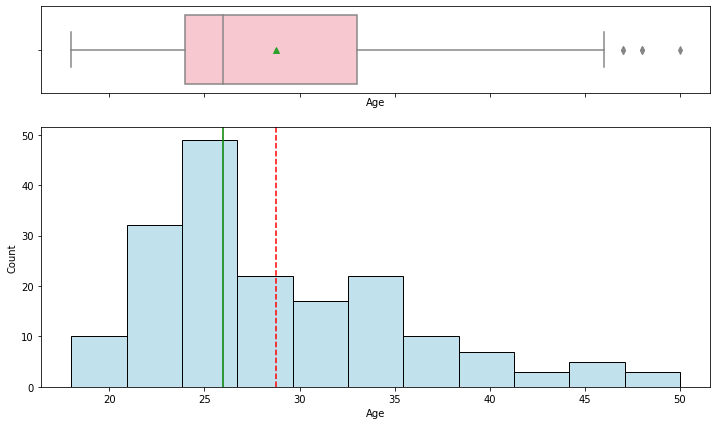

In [13]:
# Observations on Age for demographic
histogram_boxplot(df,'Age')

- *Customers in the range of age 18 to 35 have more participation in  fitness project. Mostly with age around 26 to 27 years old*
- *customer older than 42 years have less participation*

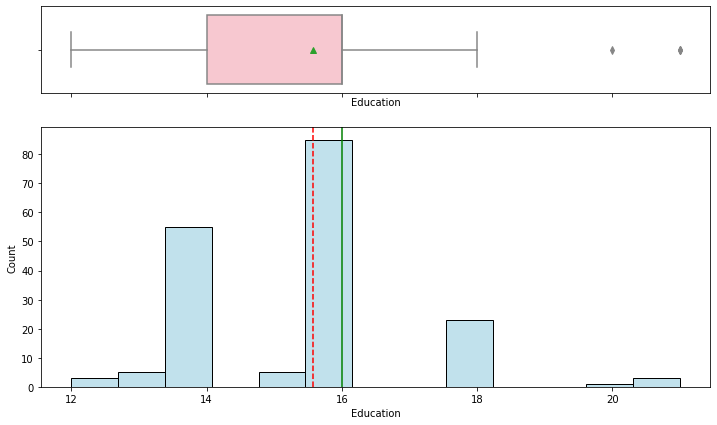

In [14]:
# Observations on Education
histogram_boxplot(df,'Education')

- *There are some outliers for number of years of education*


In [15]:
# Outlier for number of years in Education
data[data['Education'] >=20 ].shape[0]

4

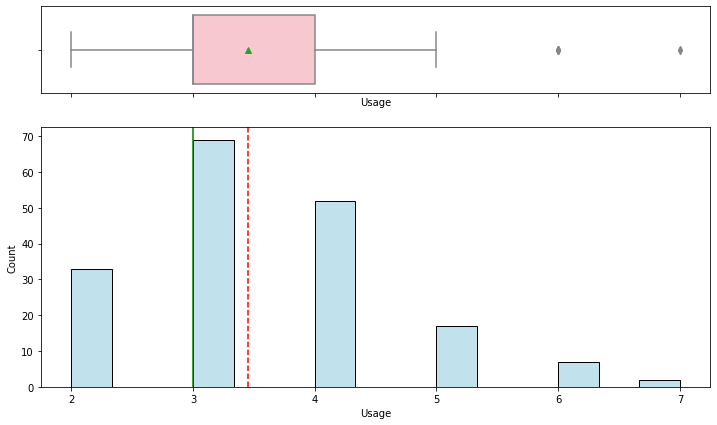

In [16]:
# Observations on Usage
histogram_boxplot(df,'Usage')

- *Mostly customer wants to use trademill 3 to 4 days a week*


2

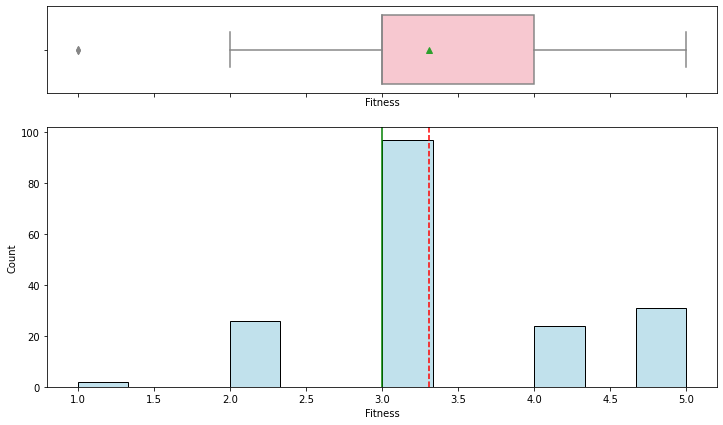

In [17]:
# Observations on Fitness and outlier count
histogram_boxplot(df,'Fitness')
data[data['Fitness'] <=1 ].shape[0]

- *Most of customer rate themselves average in fitness. Potential to motivate them to bring to higher end with those rated 2*
- *Not many outliers. Only 2 individuals self rated as 1* 


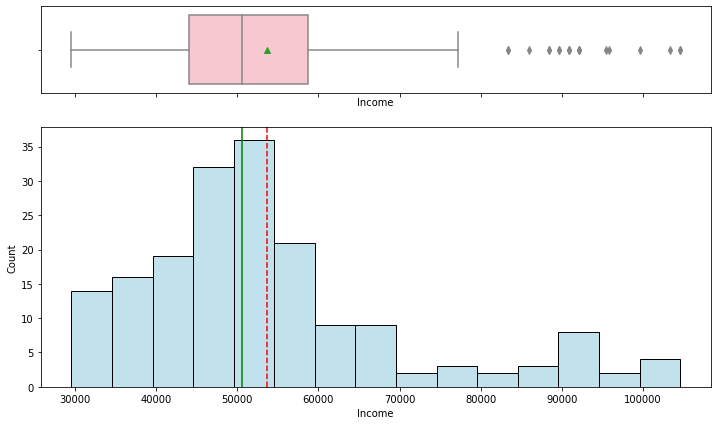

In [18]:
# Observations on Income
histogram_boxplot(df,'Income')

- *The distribution of Income is slightly right skewed*
- *There are more outliers for Income dataset compare to other values* 
- *Most customers are in the mean range for income. (40K to 60K)*

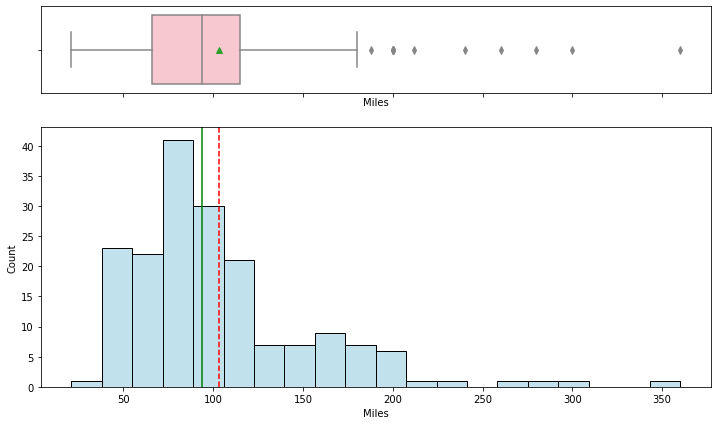

In [19]:
# Observations on Miles
histogram_boxplot(df,'Miles')

- *The distribution of miles is  right skewed*
- *There are few outliers  for miles* 
- *While mostly the number of miles customer expected to run are average , we have observations where the number of miles ran by customer went as high as 350*

##### **Exploring categorical values**

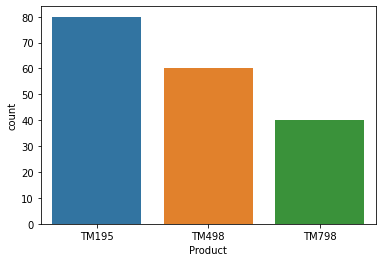

In [20]:
#Observation with Product
sns.countplot(data=df,x='Product');

- *There is more interest in model TM195 compare to other models.*

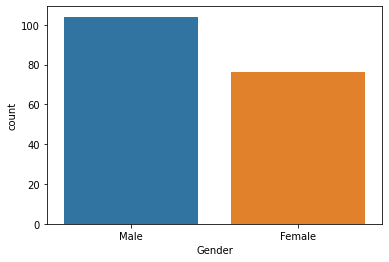

In [21]:
#Observation with Gender
sns.countplot(data=df,x='Gender');

- *There are more Male customers in dataset compared to Female.*

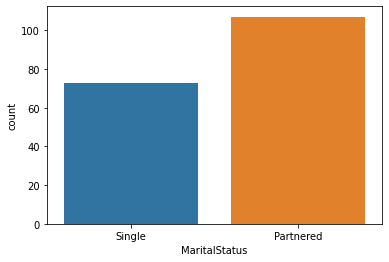

In [22]:
#Observation with MaritalStatus
sns.countplot(data=df,x='MaritalStatus');

- *There are more dataset for customers with Partnered status than Single*

### **Multivariate Data Analysis**
* Analysis of interaction between features, in the dataset.

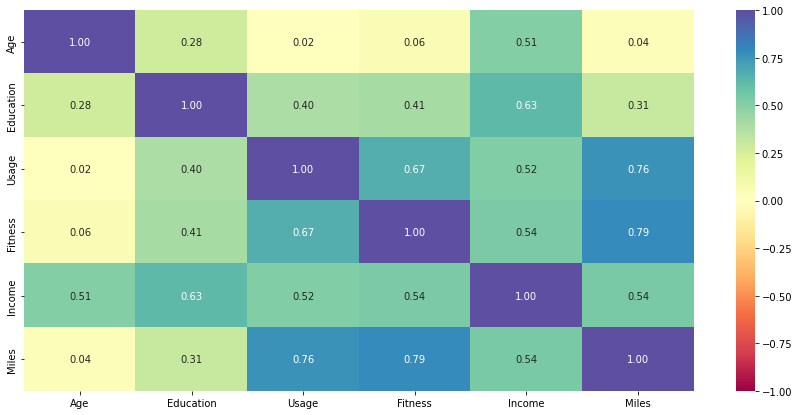

In [23]:
# Check for correlation among numerical variables
num_var = ['Age','Education','Usage','Fitness','Income', 'Miles']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *There is low correlation between age and Usage or Fitness*
- *Miles expected to run has high correlation with Fitness and Usage. More miles expected run, better fitness and high usage*

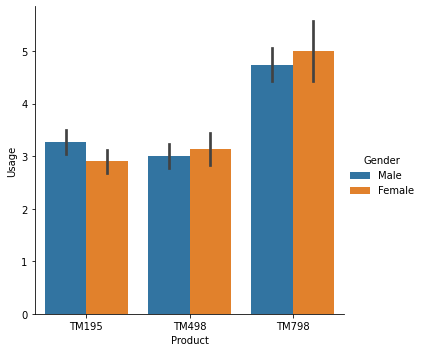

In [24]:
# Usage pattern of trademill models based on gender
sns.catplot(x='Product', y='Usage', data=df, kind="bar", hue='Gender')
plt.show()

- *TM798 model is more famous in both Male and Female customers with high weekly usage compare to other 2 products.*
- *Female customers have more usage than male customers for 2 models(TM498 and TM798).*

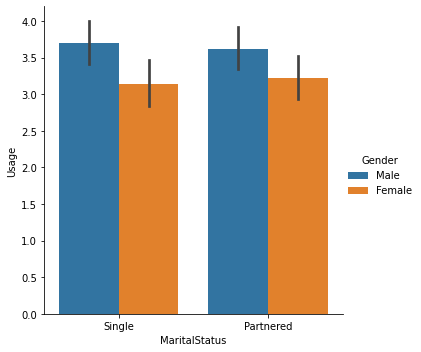

In [25]:
# Usage pattern of trademill based on MaritalStatus and gender
sns.catplot(data=df, x='MaritalStatus', y='Usage',  kind="bar", hue='Gender')
plt.show()

- *Usage pattern is similar for customer with Single or Partnered marital status.*

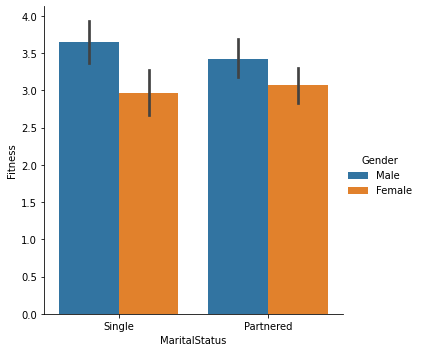

In [26]:
# Confidence in Fitness level based on MaritalStatus and gender
sns.catplot(data=df, x='MaritalStatus', y='Fitness',  kind="bar", hue='Gender')
plt.show()

- *Single or Partnered, Male customers self rated better Fitness score than Female customers*

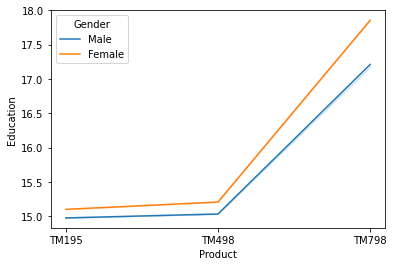

In [27]:
# Trademill model usage pattern based on Education and Gender
sns.lineplot(data=df, x='Product', y='Education',hue='Gender', ci=False)
plt.show()

- *Customers with higher number of education years are using model TM798. Seems this models specification is well understood by higher education groups*

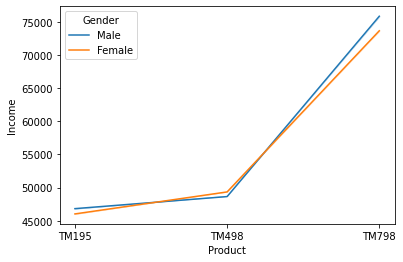

In [28]:
# Trademill model usage pattern based on Income and Gender
sns.lineplot(data=df, x='Product', y='Income',hue='Gender', ci=False)
plt.show()

- *Customers with higher Income are using model TM798. Seems this modelis expensive compare to other 2 models*

**Creating bins for Age column**
* 16 - 30  Years  - Age group will labelled as **`Young`**.
* 30 - 40 Years - Age group will labelled as **`Middle_Aged`**.
* 40 - 51 Years - Age group will labelled as **`Old_Middle_Aged`**. No Old yet. :)

In [29]:
# Defining age group bins to understand model usage in different age groups. 
df['Age_Group'] = pd.cut(data['Age'],bins=[16,30,40,51],labels=['Young','Middle_Aged','Old_Middle_Age'], right = False)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,TM195,18,Male,14,Single,3,4,29562,112,Young
1,TM195,19,Male,15,Single,2,3,31836,75,Young
2,TM195,19,Female,14,Partnered,4,3,30699,66,Young
3,TM195,19,Male,12,Single,3,3,32973,85,Young
4,TM195,20,Male,13,Partnered,4,2,35247,47,Young


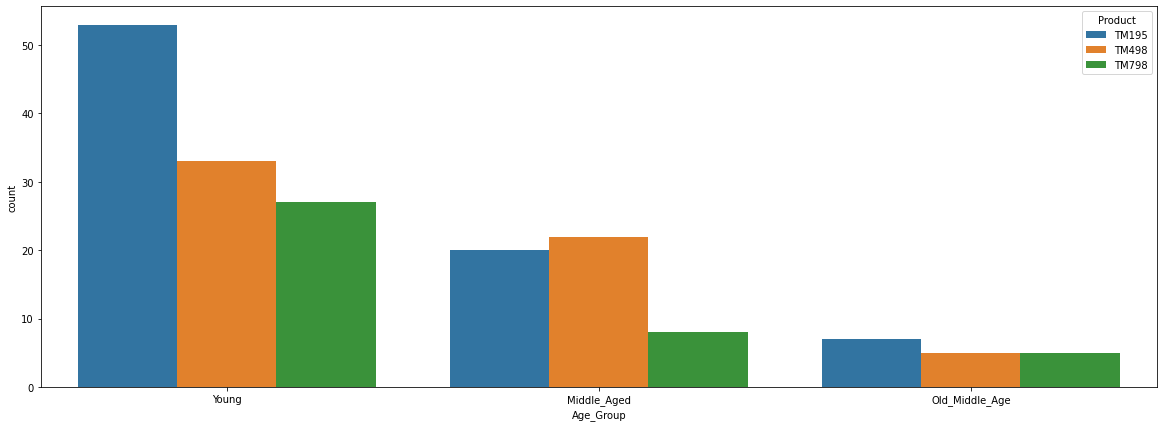

In [30]:
#Trademill model used by different age groups
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='Age_Group', hue='Product')
plt.show()

- *TM195 model is widely used by customers in all age groups.*
- *Customer in the age range from 30 to 40 years prefer TM498 model*

<Figure size 1440x504 with 0 Axes>

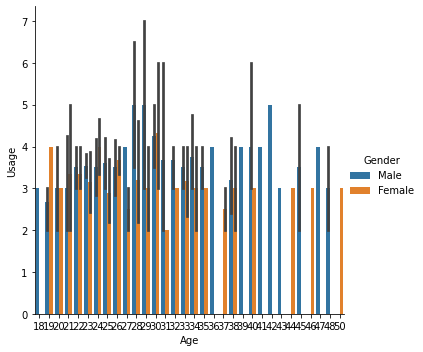

In [31]:
# Finding how age drives Usage in male and Femail
plt.figure(figsize=(20,7))
sns.catplot(data=df, x='Age', y = 'Usage', kind='bar', hue='Gender')
#plt.xticks(rotation=90)
plt.show()

- *Age of customer has less impact on usage.*

In [32]:
data.groupby(['Gender','MaritalStatus'])[['Age', 'Education', 'Usage','Fitness', 'Miles']].mean()

Age  Education     Usage   Fitness       Miles
Gender MaritalStatus                                                      
Female Partnered      28.934783  15.217391  3.217391  3.065217   93.326087
       Single         28.000000  15.666667  3.133333  2.966667   84.933333
Male   Partnered      30.606557  16.000000  3.622951  3.426230  112.557377
       Single         26.604651  15.279070  3.697674  3.651163  113.209302

- *Average Usage of trademill and Miles is higher in Male customers.*

## **Conclusion and Recommendations**
- Conclude with the key insights/observations

#### **Conclusions**

We analyzed a dataset which includes usage and fitness score for 180 customers of the treadmill product(s) of a retail store called Cardio Good Fitness.
The data collected is for both Male and Female particpants who or single or partnered.

We have been able to conclude that -  

1. TM798 model has more usage in both Male and Female customers compare to other 2 products. This model is also popular amongst customer with higher Income and more number of years in education.
2. TM195 model is widely used by customers in all age groups.
3. Average Usage of trademill, Fitness score, Miles is higher in Male customers than Female. 
4. Contrary to intuition, age of customer has less impact on Usage or Fitness score.
5. Marital Status does not has any impact on Usage of Trademill.
5. Miles expected to run has high correlation with Fitness and Usage. More miles expected run, better fitness and high usage



#### **Recommendations to business**

1. More focus is needed to get Female participation.
2. TM195 model is widely used. But Usage is lesser compared to TM798 model. Additonal features from TM798 can be studied and incorporated in TM195 model to improve Usage.

